In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
#The data describes video game sales, critic scores out of 100, and other details.
#I chose to look at the relationship between critic scores and global sales. 
data = pd.read_csv('/Users/georgiabell/Desktop/Homework Solutions/Homework 3/Video_Games_Sales_as_at_22_Dec_2016 2.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Get only necessary columns
df = data[['Global_Sales','Critic_Score']]
df.head()

,Global_Sales,Critic_Score
0,82.53,76.0
1,40.24,NaN
2,35.52,82.0
3,32.77,80.0
4,31.37,NaN


In [4]:
#Drop all rows with NaN values
df = df.dropna()
df.head()

,Global_Sales,Critic_Score
0,82.53,76.0
2,35.52,82.0
3,32.77,80.0
6,29.80,89.0
7,28.92,58.0


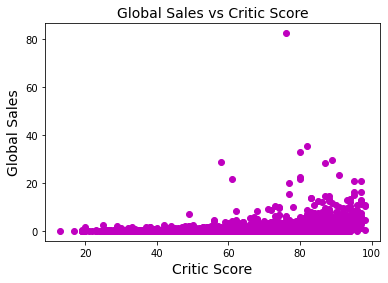

In [5]:
#Plot data
plt.scatter(df['Critic_Score'], df['Global_Sales'], color='m')
plt.title('Global Sales vs Critic Score', fontsize=14)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Global Sales', fontsize=14)
plt.show()

In [6]:
#There is large variation in Global Sales. Try using the log-linear model to see if we can resolve this. 
df['Global_Sales'] = np.log(df['Global_Sales'])

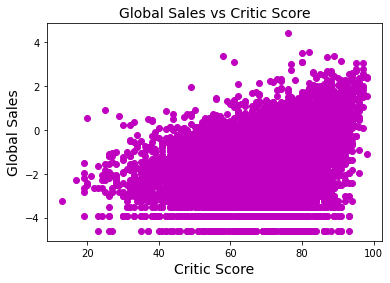

In [7]:
#Plot data
plt.scatter(df['Critic_Score'], df['Global_Sales'], color='m')
plt.title('Global Sales vs Critic Score', fontsize=14)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Global Sales', fontsize=14)
plt.show()

In [15]:
#Now the data appears to have a stronger relationship. 
#Run OLS 
x = np.asarray(df['Critic_Score'])
x = sm.add_constant(x)
y = np.asarray(df['Global_Sales'])
model = sm.OLS(y,x)
results = model.fit()

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1373.
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          5.99e-278
Time:                        15:13:41   Log-Likelihood:                -13722.
No. Observations:                8137   AIC:                         2.745e+04
Df Residuals:                    8135   BIC:                         2.746e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0475      0.073    -55.340      0.0

In [ ]:
#Interpretation β using log-linear model: A change in x by one unit is associated with a 100×β
#percent change in y

#An increase in critic score by 1 point out of 100 is associated with a 3.9% increase in global sales. 